### **QUESTION-1:**

In [2]:
import pandas as pd
a=pd.read_csv('/content/breast_cancer_survival.csv')
print(a)

     Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0     42  FEMALE  0.952560   2.15000  0.007972 -0.048340           II   
1     54  FEMALE  0.000000   1.38020 -0.498030 -0.507320           II   
2     63  FEMALE -0.523030   1.76400 -0.370190  0.010815           II   
3     78  FEMALE -0.876180   0.12943 -0.370380  0.132190            I   
4     42  FEMALE  0.226110   1.74910 -0.543970 -0.390210           II   
..   ...     ...       ...       ...       ...       ...          ...   
329   59  FEMALE  0.024598   1.40050  0.024751  0.280320           II   
330   41  FEMALE  0.100120  -0.46547  0.472370 -0.523870            I   
331   54  FEMALE  0.753820   1.64250 -0.332850  0.857860           II   
332   74  FEMALE  0.972510   1.42680 -0.366570 -0.107820           II   
333   66  FEMALE  0.286380   1.39980  0.318830  0.836050           II   

                          Histology ER status PR status HER2 status  \
0     Infiltrating Ductal Carcinoma  Positive  Posit

In [9]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/breast_cancer_survival.csv')

# Check the first few rows of the dataset to understand its structure
print(data.head())
data.dropna(inplace=True)

# Data preprocessing
data = data.drop(columns=['Histology', 'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit'], axis=1)

col_replace = ['ER status', 'PR status', 'HER2 status']
data[col_replace] = data[col_replace].replace({'Positive': 1, 'Negative': 0})

data['Patient_Status'] = data['Patient_Status'].replace({'Alive': 1, 'Dead': 0})
round_Values = round(data.Patient_Status.mean())
data.Patient_Status = data.Patient_Status.fillna(round_Values)

data['Tumour_Stage'] = data['Tumour_Stage'].replace({'I': 1, 'II': 2, 'III': 3, 'IV': 4})
data['Gender'] = data['Gender'].replace({'FEMALE': 0, 'MALE': 1})

# Split data into features and target
X = data.drop(columns=['Patient_Status', 'Gender'], axis=1)
y = data['Patient_Status']

   Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0   42  FEMALE   0.95256   2.15000  0.007972 -0.048340           II   
1   54  FEMALE   0.00000   1.38020 -0.498030 -0.507320           II   
2   63  FEMALE  -0.52303   1.76400 -0.370190  0.010815           II   
3   78  FEMALE  -0.87618   0.12943 -0.370380  0.132190            I   
4   42  FEMALE   0.22611   1.74910 -0.543970 -0.390210           II   

                       Histology ER status PR status HER2 status Surgery_type  \
0  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
1  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
2  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   Lumpectomy   
3  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
4  Infiltrating Ductal Carcinoma  Positive  Positive    Positive   Lumpectomy   

  Date_of_Surgery Date_of_Last_Visit Patient_Status  
0       20-May-18          26-Au

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Train the classifier on the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

K=2: Accuracy=0.5312, Error=0.4688
K=3: Accuracy=0.7917, Error=0.2083
K=4: Accuracy=0.7292, Error=0.2708
K=5: Accuracy=0.7604, Error=0.2396
K=6: Accuracy=0.7500, Error=0.2500
K=7: Accuracy=0.7708, Error=0.2292
K=8: Accuracy=0.7708, Error=0.2292
K=9: Accuracy=0.7917, Error=0.2083
K=10: Accuracy=0.7917, Error=0.2083
K=11: Accuracy=0.7917, Error=0.2083
K=12: Accuracy=0.7917, Error=0.2083
K=13: Accuracy=0.7917, Error=0.2083
K=14: Accuracy=0.7917, Error=0.2083
K=15: Accuracy=0.7917, Error=0.2083
K=16: Accuracy=0.7917, Error=0.2083
K=17: Accuracy=0.7917, Error=0.2083
K=18: Accuracy=0.7917, Error=0.2083
K=19: Accuracy=0.7917, Error=0.2083
K=20: Accuracy=0.7917, Error=0.2083


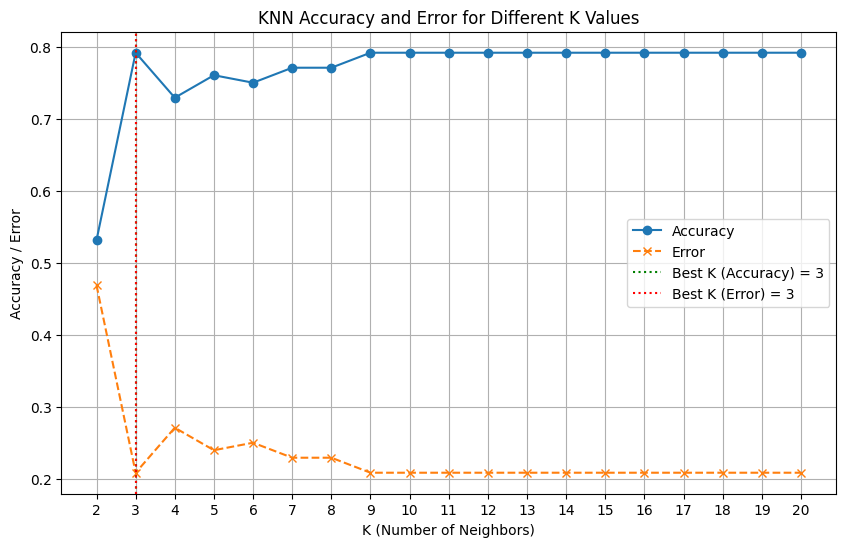

In [11]:
import matplotlib.pyplot as plt

# Initialize lists to store K values, accuracies, and errors
k_values = []
accuracies = []
errors = []

# Loop through K values from 2 to 20
for k in range(2, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    error = 1 - accuracy  # Calculate the error

    k_values.append(k)
    accuracies.append(accuracy)
    errors.append(error)

    print(f'K={k}: Accuracy={accuracy:.4f}, Error={error:.4f}')

# Find the index of the K value with the maximum accuracy
best_accuracy_index = accuracies.index(max(accuracies))
best_k_accuracy = k_values[best_accuracy_index]

# Find the index of the K value with the minimum error
best_error_index = errors.index(min(errors))
best_k_error = k_values[best_error_index]

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', label='Accuracy')
plt.plot(k_values, errors, marker='x', linestyle='--', label='Error')
plt.title('KNN Accuracy and Error for Different K Values')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy / Error')
plt.xticks(k_values)
plt.grid(True)

# Highlight the best-fitting model based on accuracy
plt.axvline(x=best_k_accuracy, color='green', linestyle=':', label=f'Best K (Accuracy) = {best_k_accuracy}')

# Highlight the best-fitting model based on error
plt.axvline(x=best_k_error, color='red', linestyle=':', label=f'Best K (Error) = {best_k_error}')

plt.legend()
plt.show()

# ***QUESTION-2:***

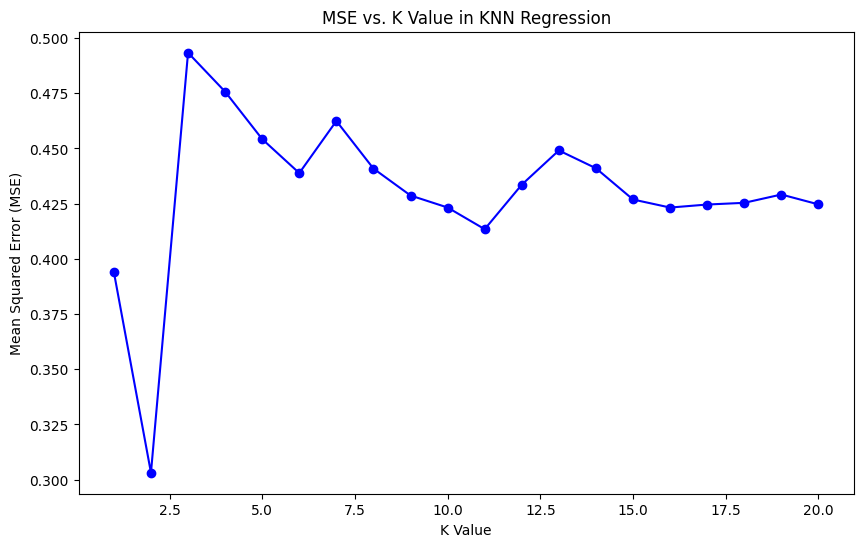

K = 1: MSE = 0.393991666666665
K = 2: MSE = 0.30310624999999813
K = 3: MSE = 0.49337870370370324
K = 4: MSE = 0.47572812500000133
K = 5: MSE = 0.45423700000000267
K = 6: MSE = 0.43885115740740915
K = 7: MSE = 0.46245680272108675
K = 8: MSE = 0.44089960937500056
K = 9: MSE = 0.42869557613169
K = 10: MSE = 0.4232494166666692
K = 11: MSE = 0.4134364325068895
K = 12: MSE = 0.4336012152777795
K = 13: MSE = 0.44910567061144585
K = 14: MSE = 0.44104255952381605
K = 15: MSE = 0.42688503703704495
K = 16: MSE = 0.42323385416666665
K = 17: MSE = 0.42460458477508717
K = 18: MSE = 0.4253780092592622
K = 19: MSE = 0.4291406278855074
K = 20: MSE = 0.42467395833333993


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_csv('/content/Japan_life_expectancy.csv')
x = data.drop(['Prefecture', 'Life_expectancy'], axis=1)
y = data['Life_expectancy']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10, test_size=0.25)

mse_values = []

k_values = np.arange(1, 21)

for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)

    knn_regressor.fit(x_train, y_train)

    y_pred = knn_regressor.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, marker='o', color='b')
plt.title('MSE vs. K Value in KNN Regression')
plt.xlabel('K Value')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()

# Print the MSE values
for k, mse in zip(k_values, mse_values):
    print(f'K = {k}: MSE = {mse}')